22p-9039
Muhammad Ashir Khan 
Labtask: 06

## Question no 1

# Best-First Search Algorithm for Maze Solving

## Overview
This program implements the **Best-First Search (BFS)** algorithm to find a path through a **maze**, using **Manhattan distance** as the heuristic.

## Working Steps

### 1. Define the Maze
- The maze is represented as a **2D grid**:
  - `0` → Open space (walkable)
  - `1` → Obstacle (not walkable)

### 2. Implement the Heuristic Function
- Uses **Manhattan distance** to estimate the cost from any point to the goal:
  - `h(a, b) = |x1 - x2| + |y1 - y2|`

### 3. Best-First Search Algorithm
- Uses a **priority queue** to prioritize nodes **closer to the goal**.
- Expands nodes **one step at a time**, always moving towards the goal.

### 4. Path Exploration and Visualization
- At each step:
  - Selects the **lowest heuristic** node.
  - Updates and **prints the maze** with the current path (`*`).
  - Marks the **visited nodes** to avoid cycles.

### 5. Find and Display the Final Path
- If the **goal is reached**, prints the path taken.
- If no path exists, returns an empty list.

### 6. Example Run
- The program starts at `(0, 0)` and tries to reach `(4, 4)`.
- The steps are displayed to show the **search process**.


In [44]:
import queue

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Manhattan distance

def printMaze(maze, path):
    # Convert the maze to a string with '0' as open spaces and '1' as blocked spaces
    mazeStr = ''
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if (i, j) in path:
                mazeStr += '*'  # Mark the path with '*'
            else:
                mazeStr += '0' if maze[i][j] == 0 else '1'  # '0' for open space, '1' for obstacle
            mazeStr += ' '  # Add space between cells for better readability
        mazeStr += '\n'  # Add a new line after each row
    print(mazeStr)

def bestFirstSearch(maze, start, goal, showSteps=False):
    rows, cols = len(maze), len(maze[0])
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up but not diagonals
    
    priQueue = queue.PriorityQueue()  # Priority queue
    priQueue.put((heuristic(start, goal), [start]))  # Initial state
    visited = set()
    
    step = 0
    while not priQueue.empty():
        step += 1
        _, currentPath = priQueue.get()  # we _, use to ignore the first value.
        currentNode = currentPath[-1]
        
        if showSteps:
            currentHeuristic = heuristic(currentNode, goal)
            print(f"Step {step}: Current Path: {currentPath}")
            print(f"Current Node: {currentNode} | Heuristic: {currentHeuristic}")
            print("Maze Updated")
            printMaze(maze, currentPath)  # Print the maze with the current path
        
        if currentNode == goal:
            return currentPath  # Goal found
        
        visited.add(currentNode)
        
        for d in directions:
            neighbor = (currentNode[0] + d[0], currentNode[1] + d[1])
            
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and maze[neighbor[0]][neighbor[1]] == 0:
                if neighbor not in visited:
                    newPath = currentPath + [neighbor]
                    priQueue.put((heuristic(neighbor, goal), newPath))
    
    return []  # Goal not found

# Example maze
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

path = bestFirstSearch(maze, start, goal, showSteps=True)
print("Final Path:", path)


Step 1: Current Path: [(0, 0)]
Current Node: (0, 0) | Heuristic: 8
Maze Updated
* 1 0 0 0 
0 1 0 1 0 
0 0 0 1 0 
0 1 1 0 0 
0 0 0 0 0 

Step 2: Current Path: [(0, 0), (1, 0)]
Current Node: (1, 0) | Heuristic: 7
Maze Updated
* 1 0 0 0 
* 1 0 1 0 
0 0 0 1 0 
0 1 1 0 0 
0 0 0 0 0 

Step 3: Current Path: [(0, 0), (1, 0), (2, 0)]
Current Node: (2, 0) | Heuristic: 6
Maze Updated
* 1 0 0 0 
* 1 0 1 0 
* 0 0 1 0 
0 1 1 0 0 
0 0 0 0 0 

Step 4: Current Path: [(0, 0), (1, 0), (2, 0), (2, 1)]
Current Node: (2, 1) | Heuristic: 5
Maze Updated
* 1 0 0 0 
* 1 0 1 0 
* * 0 1 0 
0 1 1 0 0 
0 0 0 0 0 

Step 5: Current Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)]
Current Node: (2, 2) | Heuristic: 4
Maze Updated
* 1 0 0 0 
* 1 0 1 0 
* * * 1 0 
0 1 1 0 0 
0 0 0 0 0 

Step 6: Current Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2)]
Current Node: (1, 2) | Heuristic: 5
Maze Updated
* 1 0 0 0 
* 1 * 1 0 
* * * 1 0 
0 1 1 0 0 
0 0 0 0 0 

Step 7: Current Path: [(0, 0), (1, 0), (2, 0), (3, 0)]
Current N

## Question no 2:

# A* Algorithm for Finding Shortest Path in a Graph

## Overview
This program reads city connections and distances from a CSV file and finds the shortest path between two cities using the **A* (A-Star) algorithm**.

## Working Steps

### 1. Load Graph from CSV
- Reads a CSV file containing **city connections** and **distances**.
- Creates a **graph using NetworkX**, where:
  - **Nodes** represent cities.
  - **Edges** represent distances between them.

### 2. Calculate Heuristic Distances
- Uses the **Minkowski distance formula** to estimate heuristic costs from each city to the destination.

### 3. Implement A* Algorithm
- Uses a **priority queue** to explore the shortest path.
- At each step:
  - Selects the **city with the lowest cost** (actual distance + heuristic estimate).
  - Updates the **path** and continues until the **goal city** is reached.

### 4. Print Node Exploration Details
- Displays:
  - **Visited nodes**
  - **Actual distances (g)**
  - **Heuristic estimates (h)**
  - **Total cost (f = g + h)**

### 5. Find and Display the Optimal Path
- **Prints** the shortest path between the selected cities if found.

### 6. Visualize the Graph
- Uses **Matplotlib and NetworkX** to **draw the graph** with labeled distances.
- **Highlights the optimal path in red** for better visibility.


Enter source city:  Goa
Enter destination city:  Thiruvananthapuram


Visiting Node: Goa
Actual Distance (g): 0
Heuristic Distance (h): 0.3410777614512853
Total Cost (f = g + h): 0.3410777614512853
----------------------------------------
Visiting Node: Pune
Actual Distance (g): 442
Heuristic Distance (h): 0.5563396803546827
Total Cost (f = g + h): 442.5563396803547
----------------------------------------
Visiting Node: Bengaluru
Actual Distance (g): 562
Heuristic Distance (h): 0.5852806826226512
Total Cost (f = g + h): 562.5852806826226
----------------------------------------
Visiting Node: Mumbai
Actual Distance (g): 585
Heuristic Distance (h): 0.7664429437344469
Total Cost (f = g + h): 585.7664429437344
----------------------------------------
Visiting Node: Mumbai
Actual Distance (g): 592
Heuristic Distance (h): 0.7664429437344469
Total Cost (f = g + h): 592.7664429437344
----------------------------------------
Visiting Node: Hyderabad
Actual Distance (g): 674
Heuristic Distance (h): 0.7000535542793661
Total Cost (f = g + h): 674.7000535542794
---

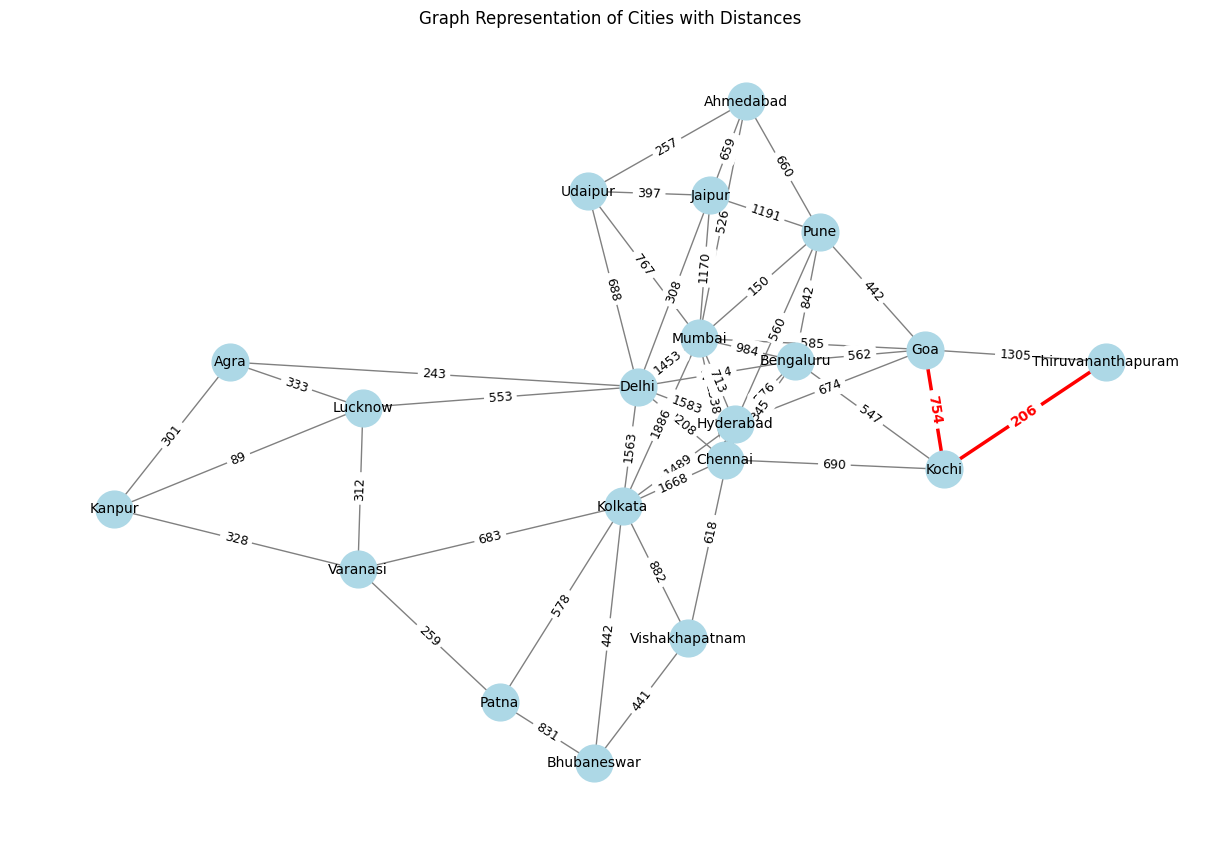

In [103]:
import networkx as nx
import math
import queue
import pandas as pd
import matplotlib.pyplot as plt

# Minkowski distance function (p=3 by default, can be changed)
def minkowskiDistance(node1, node2, position, p=3):
    x1, y1 = position[node1]
    x2, y2 = position[node2]
    return (abs(x2 - x1) ** p + abs(y2 - y1) ** p) ** (1 / p)

# A* Algorithm for finding the optimal path
def aStar(graph, start, goal, heuristic):
    visited = set()  # To track visited nodes
    priorityQueue = queue.PriorityQueue()  # Priority queue for A* algorithm
    priorityQueue.put((0 + heuristic[start], [start], 0))  # Start with the initial node (f, path, g)

    while not priorityQueue.empty():
        f, currentPath, gValue = priorityQueue.get()
        currentNode = currentPath[-1]

        if currentNode == goal:  # If goal is reached
            return currentPath

        visited.add(currentNode)

        print(f"Visiting Node: {currentNode}")
        print(f"Actual Distance (g): {gValue}")
        print(f"Heuristic Distance (h): {heuristic[currentNode]}")
        print(f"Total Cost (f = g + h): {f}")
        print("-" * 40)

        for neighbor in graph.neighbors(currentNode):
            if neighbor not in visited:
                g = gValue + graph[currentNode][neighbor]['weight']  # Actual distance from current to neighbor
                newPath = currentPath + [neighbor]
                priorityQueue.put((g + heuristic[neighbor], newPath, g))

    return []

# Function to load graph from CSV file
def loadGraph(filePath):
    dataFrame = pd.read_csv(filePath)
    graph = nx.Graph()
    for _, row in dataFrame.iterrows():
        origin, destination, distance = row["Origin"], row["Destination"], row["Distance"]
        graph.add_edge(origin, destination, weight=distance)  # Add edge with distance as weight
    return graph

# Function to visualize the graph with edge weights
def visualizeGraph(graph, position, path):
    plt.figure(figsize=(12, 8))

    # Draw nodes
    nx.draw(graph, position, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10)

    # Draw all edges
    edgeLabels = {(u, v): f"{graph[u][v]['weight']}" for u, v in graph.edges()}
    nx.draw_networkx_edge_labels(graph, position, edge_labels=edgeLabels, font_color='black', font_size=9)

    # Draw the optimal path in red
    if path:
        pathEdges = list(zip(path, path[1:]))  # Convert path to edge pairs
        nx.draw_networkx_edges(graph, position, edgelist=pathEdges, edge_color='red', width=2.5)

        # Highlight optimal path distances in red
        pathLabels = {(u, v): f"{graph[u][v]['weight']}" for u, v in pathEdges}
        nx.draw_networkx_edge_labels(graph, position, edge_labels=pathLabels, font_color='red', font_size=10, font_weight="bold")

    plt.title("Graph Representation of Cities with Distances")
    plt.show()

if __name__ == "__main__":
    filePath = "indian-cities-dataset.csv"  # Provide your CSV file path here
    graph = loadGraph(filePath)  # Load graph from CSV
    
    # Taking input from user for source and destination
    start = input("Enter source city: ")
    goal = input("Enter destination city: ")

    # Generate positions for graph nodes (random layout)
    position = nx.spring_layout(graph, seed=42)  
    
    # Calculating heuristic distances for each city (node)
    heuristic = {node: minkowskiDistance(node, goal, position, p=3) for node in graph.nodes}

    # Finding the optimal path using A* algorithm
    path = aStar(graph, start, goal, heuristic)
    
    if path:
        print("Optimal path:", " -> ".join(path))
    else:
        print("No path found between", start, "and", goal)

    # Visualizing the graph with edge weights
    visualizeGraph(graph, position, path)
